In [ ]:
%tensorflow_version 1.x 
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# data preparation
data = input_data.read_data_sets('data/MNIST/', one_hot=True);
train_num = data.train.num_examples
valid_num = data.validation.num_examples
test_num = data.test.num_examples
img_flatten = 784
img_size = 28
num_classes = 10

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


Batch Size:    4, Training Loss: 0.0002601, Training Accuracy: 100.0%, Test Loss: 0.05867, Test Accuracy:  97.9%, Sensitivity: 0.009698
Batch Size:   16, Training Loss: 0.003231, Training Accuracy: 100.0%, Test Loss: 0.03813, Test Accuracy:  98.7%, Sensitivity: 0.009907
Batch Size:   64, Training Loss: 0.008334, Training Accuracy: 100.0%, Test Loss: 0.03392, Test Accuracy:  98.8%, Sensitivity: 0.01095
Batch Size:  256, Training Loss: 0.01911, Training Accuracy:  99.2%, Test Loss: 0.02986, Test Accuracy:  98.9%, Sensitivity: 0.01102
Batch Size:  512, Training Loss: 0.009075, Training Accuracy:  99.8%, Test Loss: 0.02955, Test Accuracy:  99.0%, Sensitivity: 0.01106
Batch Size: 1024, Training Loss: 0.02058, Training Accuracy:  99.2%, Test Loss: 0.02937, Test Accuracy:  99.0%, Sensitivity: 0.01108
Batch Size: 2048, Training Loss: 0.01512, Training Accuracy:  99.7%, Test Loss: 0.02937, Test Accuracy:  99.0%, Sensitivity: 0.01211
Batch Size: 4096, Training Loss: 0.01247, Training Accuracy:  

Text(0.5, 1.0, 'Accuracy vs Batch Size')

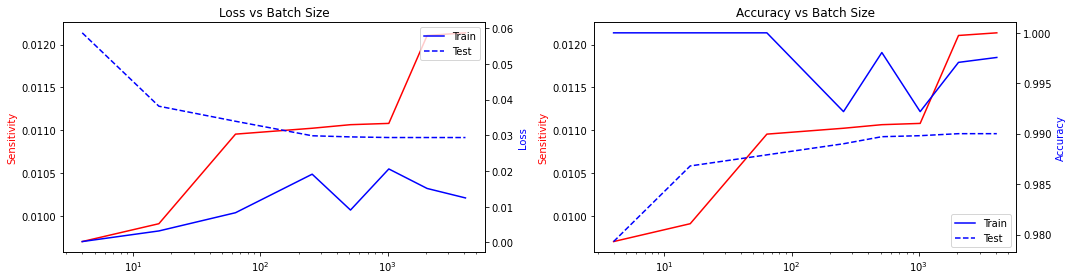

In [ ]:
# model 1-bath size
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool1);
fc1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))
train_loss_list1 = []
train_acc_list1 = []
test_loss_list1 = []
test_acc_list1 = []
sens_list1 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = [4,16,64,256,512,1024,2048,4096]
for i in range(len(BATCH_SIZE)):
    for j in range(int(data.train.num_examples/BATCH_SIZE[i])):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE[i])
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list1.append(train_loss)
    train_acc_list1.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    test_acc_list1.append(test_acc)
    sens_list1.append(sens)
    msg = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(BATCH_SIZE[i], train_loss, train_acc, test_loss, test_acc, sens))

fig,axs=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_tight_layout('tight')
axs[0].plot(BATCH_SIZE,sens_list1,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Batch Size(log scale)',size=10)
axs[0].legend(['Sensitivity'],loc=6)
axs1 = axs[0].twinx()
axs1.plot(BATCH_SIZE, train_loss_list1,'b')
axs1.plot(BATCH_SIZE, test_loss_list1,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Batch Size(log scale)')
axs1.legend(['Train','Test'],loc=4)
axs1.set_title('Loss vs Batch Size')

axs[1].plot(BATCH_SIZE,sens_list1,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Batch Size(log scale)',size=10)
axs[1].legend(['Sensitivity'],loc=6)
axs2 = axs[1].twinx()
axs2.plot(BATCH_SIZE, train_acc_list1,'b')
axs2.plot(BATCH_SIZE, test_acc_list1,'b--')
axs2.set_ylabel('Accuracy')
axs2.yaxis.label.set_color('blue')
axs2.set_xlabel('Batch Size(log scale)')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size')


Learn rate: 0.05, Training Loss: 0.4108, Training Accuracy:  91.4%, Test Loss: 0.3403, Test Accuracy:  91.5%, Sensitivity: 0.008611
Learn rate: 0.01, Training Loss: 0.2597, Training Accuracy:  93.0%, Test Loss: 0.2428, Test Accuracy:  93.4%, Sensitivity: 0.009596
Learn rate: 0.005, Training Loss: 0.151, Training Accuracy:  94.5%, Test Loss: 0.197, Test Accuracy:  94.4%, Sensitivity: 0.009758
Learn rate: 0.001, Training Loss: 0.1149, Training Accuracy:  96.1%, Test Loss: 0.1667, Test Accuracy:  95.2%, Sensitivity: 0.009851
Learn rate: 0.0005, Training Loss: 0.2782, Training Accuracy:  93.0%, Test Loss: 0.1427, Test Accuracy:  96.0%, Sensitivity: 0.009629
Learn rate: 0.0001, Training Loss: 0.05036, Training Accuracy:  98.4%, Test Loss: 0.1249, Test Accuracy:  96.5%, Sensitivity: 0.009399


Text(0.5, 1.0, 'Accuracy vs Learning Rate')

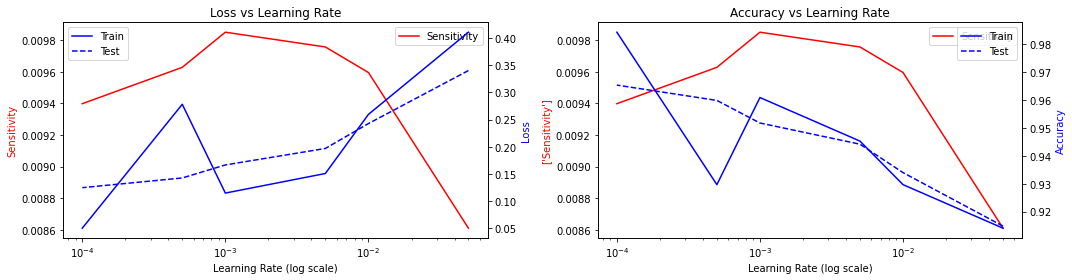

In [ ]:
# model 1-learning rate


tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)
learning_rate = tf.placeholder(tf.float32)

conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool1);
fc1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

train_loss_list2 = []
train_acc_list2 = []
test_loss_list2 = []
test_acc_list2 = []
sens_list2 = []
init = tf.global_variables_initializer()

lr_list = [0.01,0.05,0.001,0.005,0.0001,0.0005]
init = tf.global_variables_initializer()
Batchsize = 128

with tf.Session() as sess:
    sess.run(init)
    for i in range(len(lr_list)):
        for j in range(data.train.num_examples//Batchsize):
            x_batch, y_batch = data.train.next_batch(Batchsize)
            sess.run(train_op, feed_dict={x: x_batch,y: y_batch,learning_rate:lr_list[i]})
        train_loss, train_acc = sess.run([loss,acc_op],feed_dict={x:x_batch,y:y_batch})
        train_loss_list2.append(train_loss)
        train_acc_list2.append(train_acc)
        test_loss, test_acc, sens = sess.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
        test_loss_list2.append(test_loss)
        test_acc_list2.append(test_acc)
        sens_list2.append(sens)
        msg = "Learn rate: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
        print(msg.format(lr_list[i], train_loss, train_acc, test_loss, test_acc, sens))

fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(lr_list,sens_list2,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Learning Rate (log scale)')
axs[0].legend(['Sensitivity'])
axs1 = axs[0].twinx()
axs1.plot(lr_list, train_loss_list2,'b')
axs1.plot(lr_list, test_loss_list2,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Learning Rate(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Learning Rate')

axs[1].plot(lr_list,sens_list2,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Learning Rate (log scale)')
axs[1].legend(['Sensitivity'])
axs2 = axs[1].twinx()
axs2.plot(lr_list, train_acc_list2,'b')
axs2.plot(lr_list, test_acc_list2,'b--')
axs2.set_ylabel('Accuracy')
axs2.set_xlabel('Learning Rate(log scale)')
axs2.yaxis.label.set_color('blue')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Learning Rate')

Batch Size:    4, Training Loss: 1.109e-05, Training Accuracy: 100.0%, Test Loss: 0.04033, Test Accuracy:  98.6%, Sensitivity: 0.01085
Batch Size:   16, Training Loss: 0.0001556, Training Accuracy: 100.0%, Test Loss: 0.03354, Test Accuracy:  98.9%, Sensitivity: 0.01063
Batch Size:   64, Training Loss: 0.001111, Training Accuracy: 100.0%, Test Loss: 0.02478, Test Accuracy:  99.1%, Sensitivity: 0.01002
Batch Size:  256, Training Loss: 0.002557, Training Accuracy: 100.0%, Test Loss: 0.02343, Test Accuracy:  99.1%, Sensitivity: 0.01078
Batch Size:  512, Training Loss: 0.002369, Training Accuracy: 100.0%, Test Loss: 0.02352, Test Accuracy:  99.1%, Sensitivity: 0.01117
Batch Size: 1024, Training Loss: 0.0114, Training Accuracy:  99.5%, Test Loss: 0.02373, Test Accuracy:  99.1%, Sensitivity: 0.01132
Batch Size: 2048, Training Loss: 0.004877, Training Accuracy:  99.9%, Test Loss: 0.02372, Test Accuracy:  99.1%, Sensitivity: 0.01132
Batch Size: 4096, Training Loss: 0.003973, Training Accuracy: 

Text(0.5, 1.0, 'Accuracy vs Batch Size')

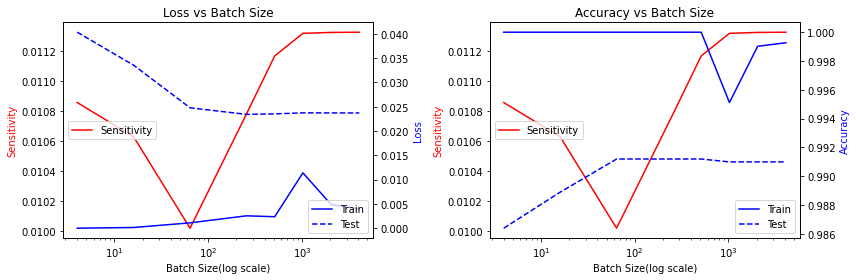

In [ ]:
# model 2-batch size
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))
train_loss_list1 = []
train_acc_list1 = []
test_loss_list1 = []
test_acc_list1 = []
sens_list1 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = [4,16,64,256,512,1024,2048,4096]
for i in range(len(BATCH_SIZE)):
    for j in range(int(data.train.num_examples/BATCH_SIZE[i])):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE[i])
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list1.append(train_loss)
    train_acc_list1.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    test_acc_list1.append(test_acc)
    sens_list1.append(sens)
    msg = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(BATCH_SIZE[i], train_loss, train_acc, test_loss, test_acc, sens))

fig,axs=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_tight_layout('tight')
axs[0].plot(BATCH_SIZE,sens_list1,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Batch Size(log scale)',size=10)
axs[0].legend(['Sensitivity'])
axs1 = axs[0].twinx()
axs1.plot(BATCH_SIZE, train_loss_list1,'b')
axs1.plot(BATCH_SIZE, test_loss_list1,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Batch Size(log scale)')
axs1.legend(['Train','Test'],loc=4)
axs1.set_title('Loss vs Batch Size')

axs[1].plot(BATCH_SIZE,sens_list1,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Batch Size(log scale)',size=10)
axs[1].legend(['Sensitivity'],loc=6)
axs2 = axs[1].twinx()
axs2.plot(BATCH_SIZE, train_acc_list1,'b')
axs2.plot(BATCH_SIZE, test_acc_list1,'b--')
axs2.set_ylabel('Accuracy')
axs2.yaxis.label.set_color('blue')
axs2.set_xlabel('Batch Size(log scale)')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size')


Learn rate: 0.05, Training Loss: 2.303, Training Accuracy:  14.1%, Test Loss: 2.305, Test Accuracy:  11.3%, Sensitivity: 0.0
Learn rate: 0.01, Training Loss: 2.296, Training Accuracy:  14.1%, Test Loss: 2.302, Test Accuracy:  11.3%, Sensitivity: 0.0
Learn rate: 0.005, Training Loss: 2.297, Training Accuracy:  10.9%, Test Loss: 2.301, Test Accuracy:  11.3%, Sensitivity: 0.0
Learn rate: 0.001, Training Loss: 2.304, Training Accuracy:   7.8%, Test Loss: 2.301, Test Accuracy:  11.3%, Sensitivity: 0.0
Learn rate: 0.0005, Training Loss: 2.299, Training Accuracy:  10.9%, Test Loss: 2.301, Test Accuracy:  11.3%, Sensitivity: 0.0
Learn rate: 0.0001, Training Loss: 2.298, Training Accuracy:  10.9%, Test Loss: 2.301, Test Accuracy:  11.3%, Sensitivity: 0.0


Text(0.5, 1.0, 'Accuracy vs Learning Rate')

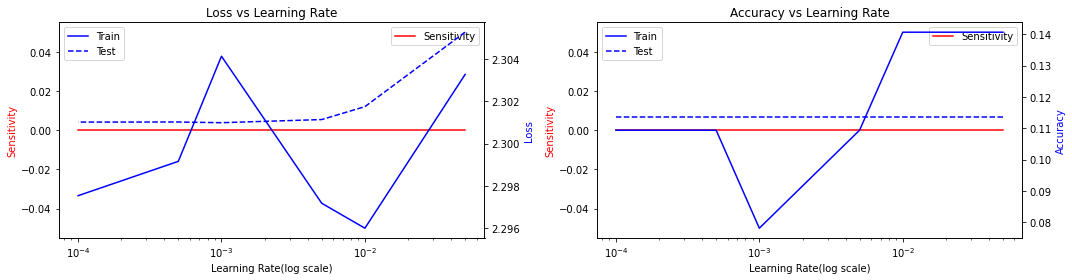

In [ ]:
# model 2-learning rate
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)
learning_rate = tf.placeholder(tf.float32)

conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))
train_loss_list2 = []
train_acc_list2 = []
test_loss_list2 = []
test_acc_list2 = []
sens_list2 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

lr_list = [0.01,0.05,0.001,0.005,0.0001,0.0005]
BATCH_SIZE = 64
for i in range(len(lr_list)):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch,learning_rate:lr_list[i]})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list2.append(train_loss)
    train_acc_list2.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list2.append(test_loss)
    test_acc_list2.append(test_acc)
    sens_list2.append(sens)
    msg = "Learn rate: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(lr_list[i], train_loss, train_acc, test_loss, test_acc, sens))
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(lr_list,sens_list2,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Learning Rate (log scale)')
axs[0].legend(['Sensitivity'])
axs1 = axs[0].twinx()
axs1.plot(lr_list, train_loss_list2,'b')
axs1.plot(lr_list, test_loss_list2,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Learning Rate(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Learning Rate')

axs[1].plot(lr_list,sens_list2,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel(['Sensitivity'])
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Learning Rate (log scale)')
axs[1].legend(['Sensitivity'])
axs2 = axs[1].twinx()
axs2.plot(lr_list, train_acc_list2,'b')
axs2.plot(lr_list, test_acc_list2,'b--')
axs2.set_ylabel('Accuracy')
axs2.set_xlabel('Learning Rate(log scale)')
axs2.yaxis.label.set_color('blue')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Learning Rate')

Batch Size:    4, Training Loss: 0.0759, Training Accuracy: 100.0%, Test Loss: 0.1228, Test Accuracy:  96.2%, Sensitivity: 0.01775
Batch Size:   16, Training Loss: 0.0143, Training Accuracy: 100.0%, Test Loss: 0.08378, Test Accuracy:  97.5%, Sensitivity: 0.01668
Batch Size:   64, Training Loss: 0.03128, Training Accuracy:  98.4%, Test Loss: 0.0652, Test Accuracy:  98.1%, Sensitivity: 0.01649
Batch Size:  256, Training Loss: 0.0152, Training Accuracy: 100.0%, Test Loss: 0.064, Test Accuracy:  98.1%, Sensitivity: 0.01644
Batch Size:  512, Training Loss: 0.02909, Training Accuracy:  99.2%, Test Loss: 0.0634, Test Accuracy:  98.1%, Sensitivity: 0.01671
Batch Size: 1024, Training Loss: 0.01309, Training Accuracy:  99.5%, Test Loss: 0.06343, Test Accuracy:  98.1%, Sensitivity: 0.01691
Batch Size: 2048, Training Loss: 0.01698, Training Accuracy:  99.7%, Test Loss: 0.06319, Test Accuracy:  98.1%, Sensitivity: 0.01687
Batch Size: 4096, Training Loss: 0.01418, Training Accuracy:  99.7%, Test Los

Text(0.5, 1.0, 'Accuracy vs Batch Size')

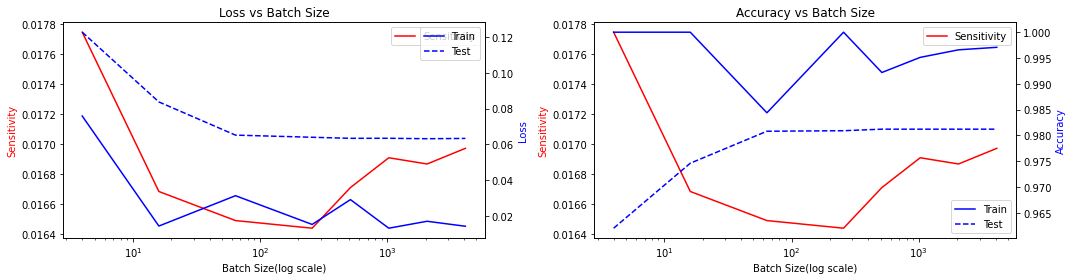

In [ ]:
# model 3_batch size
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

flat1 = tf.layers.flatten(inputs=input_x)
h1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
h2 = tf.layers.dense(inputs=h1,units=256,activation=tf.nn.relu);
h3 = tf.layers.dense(inputs=h1,units=128,activation=tf.nn.relu);
h4 = tf.layers.dense(inputs=h1,units=64,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=h4,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))
train_loss_list1 = []
train_acc_list1 = []
test_loss_list1 = []
test_acc_list1 = []
sens_list1 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = [4,16,64,256,512,1024,2048,4096]
for i in range(len(BATCH_SIZE)):
    for j in range(int(data.train.num_examples/BATCH_SIZE[i])):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE[i])
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list1.append(train_loss)
    train_acc_list1.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    test_acc_list1.append(test_acc)
    sens_list1.append(sens)
    msg = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(BATCH_SIZE[i], train_loss, train_acc, test_loss, test_acc, sens))
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(BATCH_SIZE,sens_list1,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Batch Size(log scale)')
axs[0].legend(['Sensitivity'])
axs1 = axs[0].twinx()
axs1.plot(BATCH_SIZE, train_loss_list1,'b')
axs1.plot(BATCH_SIZE, test_loss_list1,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Batch Size')


axs[1].plot(BATCH_SIZE,sens_list1,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Batch Size(log scale)')
axs[1].legend(['Sensitivity'])
axs2 = axs[1].twinx()
axs2.plot(BATCH_SIZE, train_acc_list1,'b')
axs2.plot(BATCH_SIZE, test_acc_list1,'b--')
axs2.set_ylabel('Accuracy')
axs2.yaxis.label.set_color('blue')
axs2.set_xlabel('Batch Size(log scale)')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size')

Learn rate: 0.05, Training Loss: 0.2563, Training Accuracy:  92.2%, Test Loss: 0.4482, Test Accuracy:  90.9%, Sensitivity: 0.07664
Learn rate: 0.01, Training Loss: 0.09756, Training Accuracy:  98.4%, Test Loss: 0.2239, Test Accuracy:  93.8%, Sensitivity: 0.03488
Learn rate: 0.005, Training Loss: 0.1412, Training Accuracy:  96.9%, Test Loss: 0.2024, Test Accuracy:  94.6%, Sensitivity: 0.03617
Learn rate: 0.001, Training Loss: 0.03921, Training Accuracy: 100.0%, Test Loss: 0.192, Test Accuracy:  94.7%, Sensitivity: 0.03426
Learn rate: 0.0005, Training Loss: 0.2131, Training Accuracy:  93.8%, Test Loss: 0.187, Test Accuracy:  94.8%, Sensitivity: 0.03461
Learn rate: 0.0001, Training Loss: 0.1441, Training Accuracy:  96.9%, Test Loss: 0.1867, Test Accuracy:  94.8%, Sensitivity: 0.03445


Text(0.5, 1.0, 'Accuracy vs Learning Rate')

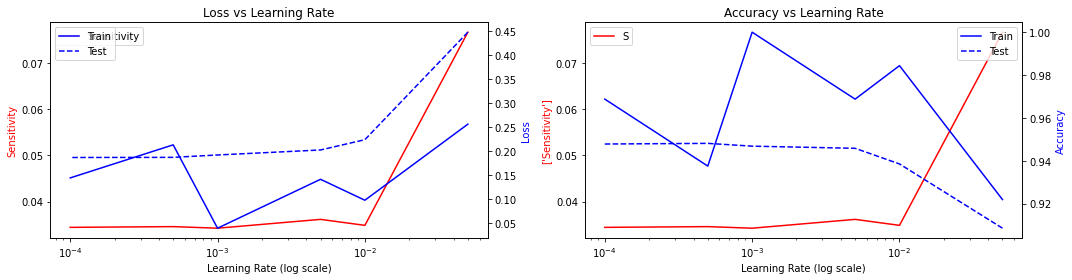

In [ ]:
# model 3-learning rate
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)
learning_rate = tf.placeholder(tf.float32)

flat1 = tf.layers.flatten(inputs=input_x)
h1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
h2 = tf.layers.dense(inputs=h1,units=256,activation=tf.nn.relu);
h3 = tf.layers.dense(inputs=h1,units=128,activation=tf.nn.relu);
h4 = tf.layers.dense(inputs=h1,units=64,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=h4,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))
train_loss_list2 = []
train_acc_list2 = []
test_loss_list2 = []
test_acc_list2 = []
sens_list2 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

lr_list = [0.01,0.05,0.001,0.005,0.0001,0.0005]
BATCH_SIZE = 64
for i in range(len(lr_list)):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch,learning_rate:lr_list[i]})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list2.append(train_loss)
    train_acc_list2.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list2.append(test_loss)
    test_acc_list2.append(test_acc)
    sens_list2.append(sens)
    msg = "Learn rate: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(lr_list[i], train_loss, train_acc, test_loss, test_acc, sens))
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(lr_list,sens_list2,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Learning Rate (log scale)')
axs[0].legend(['Sensitivity'])
axs1 = axs[0].twinx()
axs1.plot(lr_list, train_loss_list2,'b')
axs1.plot(lr_list, test_loss_list2,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Learning Rate(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Learning Rate')

axs[1].plot(lr_list,sens_list2,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel(['Sensitivity'])
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Learning Rate (log scale)')
axs[1].legend(['Sensitivity'])
axs2 = axs[1].twinx()
axs2.plot(lr_list, train_acc_list2,'b')
axs2.plot(lr_list, test_acc_list2,'b--')
axs2.set_ylabel('Accuracy')
axs2.set_xlabel('Learning Rate(log scale)')
axs2.yaxis.label.set_color('blue')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Learning Rate')

Batch Size:    4, Training Loss: 0.0001532, Training Accuracy: 100.0%, Test Loss: 0.052, Test Accuracy:  98.3%, Sensitivity: 0.01234
Batch Size:   16, Training Loss: 0.005175, Training Accuracy: 100.0%, Test Loss: 0.03664, Test Accuracy:  98.8%, Sensitivity: 0.01143
Batch Size:   64, Training Loss: 0.0009643, Training Accuracy: 100.0%, Test Loss: 0.03001, Test Accuracy:  99.0%, Sensitivity: 0.01164
Batch Size:  256, Training Loss: 0.0005576, Training Accuracy: 100.0%, Test Loss: 0.02854, Test Accuracy:  99.1%, Sensitivity: 0.01273
Batch Size:  512, Training Loss: 0.005521, Training Accuracy: 100.0%, Test Loss: 0.0283, Test Accuracy:  99.1%, Sensitivity: 0.01275
Batch Size: 1024, Training Loss: 0.006557, Training Accuracy:  99.8%, Test Loss: 0.02849, Test Accuracy:  99.1%, Sensitivity: 0.01292
Batch Size: 2048, Training Loss: 0.004526, Training Accuracy: 100.0%, Test Loss: 0.02861, Test Accuracy:  99.1%, Sensitivity: 0.013
Batch Size: 4096, Training Loss: 0.005286, Training Accuracy:  9

Text(0.5, 1.0, 'Accuracy vs Batch Size')

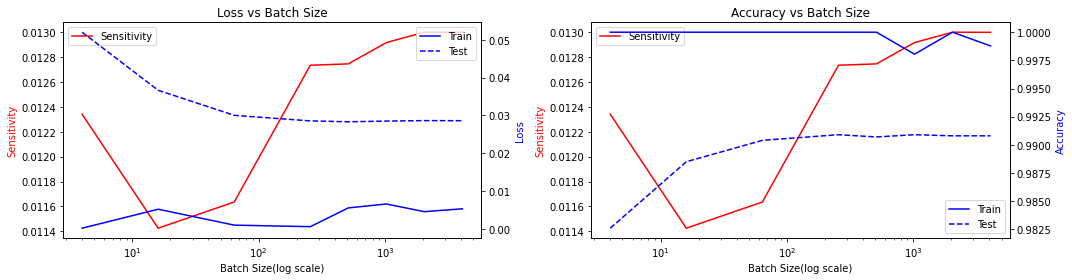

In [ ]:
# model 4-batch size
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool1);
fc1 = tf.layers.dense(inputs=flat1,units=64,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))
train_loss_list1 = []
train_acc_list1 = []
test_loss_list1 = []
test_acc_list1 = []
sens_list1 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = [4,16,64,256,512,1024,2048,4096]
for i in range(len(BATCH_SIZE)):
    for j in range(int(data.train.num_examples/BATCH_SIZE[i])):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE[i])
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list1.append(train_loss)
    train_acc_list1.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    test_acc_list1.append(test_acc)
    sens_list1.append(sens)
    msg = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(BATCH_SIZE[i], train_loss, train_acc, test_loss, test_acc, sens))
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(BATCH_SIZE,sens_list1,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Batch Size(log scale)')
axs[0].legend(['Sensitivity'])
axs1 = axs[0].twinx()
axs1.plot(BATCH_SIZE, train_loss_list1,'b')
axs1.plot(BATCH_SIZE, test_loss_list1,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Batch Size')


axs[1].plot(BATCH_SIZE,sens_list1,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Batch Size(log scale)')
axs[1].legend(['Sensitivity'])
axs2 = axs[1].twinx()
axs2.plot(BATCH_SIZE, train_acc_list1,'b')
axs2.plot(BATCH_SIZE, test_acc_list1,'b--')
axs2.set_ylabel('Accuracy')
axs2.yaxis.label.set_color('blue')
axs2.set_xlabel('Batch Size(log scale)')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size')

Learn rate: 0.05, Training Loss: 2.302, Training Accuracy:  12.5%, Test Loss: 2.306, Test Accuracy:  10.1%, Sensitivity: 0.0
Learn rate: 0.01, Training Loss: 2.297, Training Accuracy:  10.9%, Test Loss: 2.302, Test Accuracy:  11.3%, Sensitivity: 0.0
Learn rate: 0.005, Training Loss: 2.288, Training Accuracy:  15.6%, Test Loss: 2.301, Test Accuracy:  11.3%, Sensitivity: 0.0
Learn rate: 0.001, Training Loss: 2.311, Training Accuracy:   6.2%, Test Loss: 2.301, Test Accuracy:  11.3%, Sensitivity: 0.0
Learn rate: 0.0005, Training Loss: 2.308, Training Accuracy:   6.2%, Test Loss: 2.301, Test Accuracy:  11.3%, Sensitivity: 0.0
Learn rate: 0.0001, Training Loss: 2.294, Training Accuracy:   7.8%, Test Loss: 2.301, Test Accuracy:  11.3%, Sensitivity: 0.0


Text(0.5, 1.0, 'Accuracy vs Learning Rate')

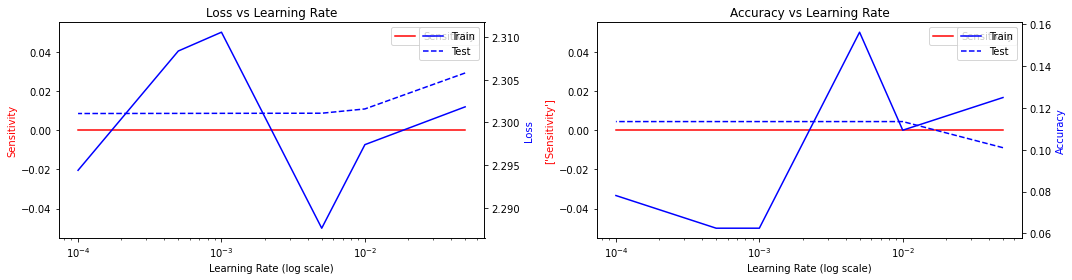

In [ ]:
#model 4 -learning rate
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)
learning_rate = tf.placeholder(tf.float32)

conv1 = tf.layers.conv2d(inputs=input_x,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool1);
fc1 = tf.layers.dense(inputs=flat1,units=64,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))
train_loss_list2 = []
train_acc_list2 = []
test_loss_list2 = []
test_acc_list2 = []
sens_list2 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

lr_list = [0.01,0.05,0.001,0.005,0.0001,0.0005]
BATCH_SIZE = 64
for i in range(len(lr_list)):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch,learning_rate:lr_list[i]})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list2.append(train_loss)
    train_acc_list2.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list2.append(test_loss)
    test_acc_list2.append(test_acc)
    sens_list2.append(sens)
    msg = "Learn rate: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(lr_list[i], train_loss, train_acc, test_loss, test_acc, sens))
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(lr_list,sens_list2,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Learning Rate (log scale)')
axs[0].legend(['Sensitivity'])
axs1 = axs[0].twinx()
axs1.plot(lr_list, train_loss_list2,'b')
axs1.plot(lr_list, test_loss_list2,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Learning Rate(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Learning Rate')

axs[1].plot(lr_list,sens_list2,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel(['Sensitivity'])
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Learning Rate (log scale)')
axs[1].legend(['Sensitivity'])
axs2 = axs[1].twinx()
axs2.plot(lr_list, train_acc_list2,'b')
axs2.plot(lr_list, test_acc_list2,'b--')
axs2.set_ylabel('Accuracy')
axs2.set_xlabel('Learning Rate(log scale)')
axs2.yaxis.label.set_color('blue')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Learning Rate')

Batch Size:    4, Training Loss: 1.288, Training Accuracy:  25.0%, Test Loss: 1.059, Test Accuracy:  64.4%, Sensitivity: 0.03529
Batch Size:   16, Training Loss: 1.048, Training Accuracy:  75.0%, Test Loss: 0.9718, Test Accuracy:  68.4%, Sensitivity: 0.03945
Batch Size:   64, Training Loss: 1.038, Training Accuracy:  62.5%, Test Loss: 0.945, Test Accuracy:  69.4%, Sensitivity: 0.04058
Batch Size:  256, Training Loss: 0.9297, Training Accuracy:  71.9%, Test Loss: 0.9397, Test Accuracy:  69.8%, Sensitivity: 0.04087
Batch Size:  512, Training Loss: 0.9544, Training Accuracy:  70.3%, Test Loss: 0.9357, Test Accuracy:  70.1%, Sensitivity: 0.04105
Batch Size: 1024, Training Loss: 0.903, Training Accuracy:  70.0%, Test Loss: 0.9342, Test Accuracy:  70.1%, Sensitivity: 0.04108
Batch Size: 2048, Training Loss: 0.962, Training Accuracy:  68.0%, Test Loss: 0.9333, Test Accuracy:  70.1%, Sensitivity: 0.0262
Batch Size: 4096, Training Loss: 0.9575, Training Accuracy:  69.1%, Test Loss: 0.9329, Test

Text(0.5, 1.0, 'Accuracy vs Batch Size')

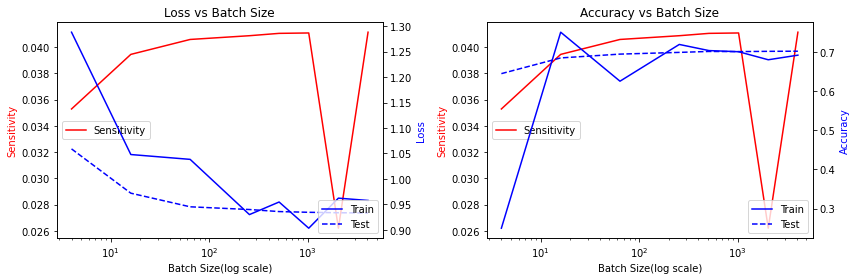

In [ ]:
#model 5 -batch size
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=1,kernel_size=3,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=1,kernel_size=3,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=4,strides=4);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=10,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))
train_loss_list1 = []
train_acc_list1 = []
test_loss_list1 = []
test_acc_list1 = []
sens_list1 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = [4,16,64,256,512,1024,2048,4096]
for i in range(len(BATCH_SIZE)):
    for j in range(int(data.train.num_examples/BATCH_SIZE[i])):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE[i])
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list1.append(train_loss)
    train_acc_list1.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    test_acc_list1.append(test_acc)
    sens_list1.append(sens)
    msg = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(BATCH_SIZE[i], train_loss, train_acc, test_loss, test_acc, sens))

fig,axs=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_tight_layout('tight')
axs[0].plot(BATCH_SIZE,sens_list1,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Batch Size(log scale)',size=10)
axs[0].legend(['Sensitivity'],loc=6)
axs1 = axs[0].twinx()
axs1.plot(BATCH_SIZE, train_loss_list1,'b')
axs1.plot(BATCH_SIZE, test_loss_list1,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Batch Size(log scale)')
axs1.legend(['Train','Test'],loc=4)
axs1.set_title('Loss vs Batch Size')

axs[1].plot(BATCH_SIZE,sens_list1,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Batch Size(log scale)',size=10)
axs[1].legend(['Sensitivity'],loc=6)
axs2 = axs[1].twinx()
axs2.plot(BATCH_SIZE, train_acc_list1,'b')
axs2.plot(BATCH_SIZE, test_acc_list1,'b--')
axs2.set_ylabel('Accuracy')
axs2.yaxis.label.set_color('blue')
axs2.set_xlabel('Batch Size(log scale)')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size')


Learn rate: 0.05, Training Loss: 0.6696, Training Accuracy:  82.8%, Test Loss: 0.7599, Test Accuracy:  75.0%, Sensitivity: 0.06297
Learn rate: 0.01, Training Loss: 0.626, Training Accuracy:  81.2%, Test Loss: 0.6933, Test Accuracy:  77.8%, Sensitivity: 0.05715
Learn rate: 0.005, Training Loss: 0.7499, Training Accuracy:  71.9%, Test Loss: 0.6809, Test Accuracy:  78.3%, Sensitivity: 0.0574
Learn rate: 0.001, Training Loss: 0.716, Training Accuracy:  71.9%, Test Loss: 0.6738, Test Accuracy:  78.1%, Sensitivity: 0.05755
Learn rate: 0.0005, Training Loss: 0.6515, Training Accuracy:  82.8%, Test Loss: 0.67, Test Accuracy:  78.4%, Sensitivity: 0.05737
Learn rate: 0.0001, Training Loss: 0.6507, Training Accuracy:  81.2%, Test Loss: 0.67, Test Accuracy:  78.5%, Sensitivity: 0.05751


Text(0.5, 1.0, 'Accuracy vs Learning Rate')

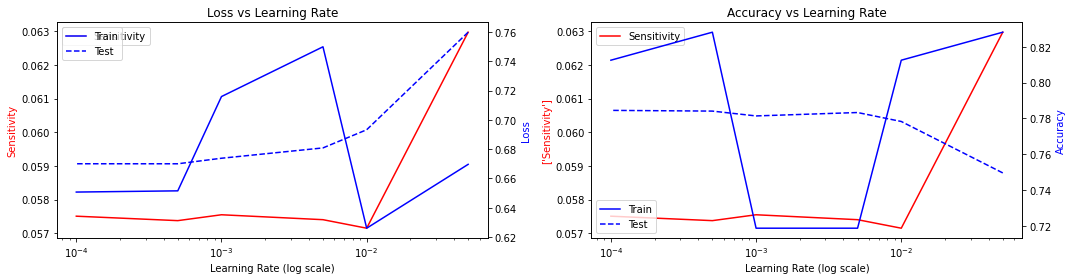

In [ ]:
# model 5-learning rate
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)
learning_rate = tf.placeholder(tf.float32)

conv1 = tf.layers.conv2d(inputs=input_x,filters=1,kernel_size=3,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=1,kernel_size=3,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=4,strides=4);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=10,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))
train_loss_list2 = []
train_acc_list2 = []
test_loss_list2 = []
test_acc_list2 = []
sens_list2 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

lr_list = [0.01,0.05,0.001,0.005,0.0001,0.0005]
BATCH_SIZE = 64
for i in range(len(lr_list)):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch,learning_rate:lr_list[i]})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list2.append(train_loss)
    train_acc_list2.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list2.append(test_loss)
    test_acc_list2.append(test_acc)
    sens_list2.append(sens)
    msg = "Learn rate: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(lr_list[i], train_loss, train_acc, test_loss, test_acc, sens))
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(lr_list,sens_list2,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs[0].set_xlabel('Learning Rate (log scale)')
axs[0].legend(['Sensitivity'])
axs1 = axs[0].twinx()
axs1.plot(lr_list, train_loss_list2,'b')
axs1.plot(lr_list, test_loss_list2,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Learning Rate(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Learning Rate')

axs[1].plot(lr_list,sens_list2,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel(['Sensitivity'])
axs[1].yaxis.label.set_color('red')
axs[1].set_xlabel('Learning Rate (log scale)')
axs[1].legend(['Sensitivity'])
axs2 = axs[1].twinx()
axs2.plot(lr_list, train_acc_list2,'b')
axs2.plot(lr_list, test_acc_list2,'b--')
axs2.set_ylabel('Accuracy')
axs2.set_xlabel('Learning Rate(log scale)')
axs2.yaxis.label.set_color('blue')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Learning Rate')